In [705]:
# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
#добавим ещё одну библиотеку для графиков
import seaborn as sns
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [706]:
df = pd.read_csv('C:\work\Churn_logreg-19480-4db098.csv', sep=';', encoding='cp1251')

In [707]:
df.head(15)

longdist internat   local int_disc    billtype   pay   age   gender  \
0     27,09        0   39,74      Нет   Бюджетный    CC  35.0  Женский   
1       NaN        0   46,31      Нет         NaN   NaN  53.0  Мужской   
2     23,76        0     NaN      NaN   Бюджетный  Auto   NaN  Женский   
3       9,4      NaN    13,9      Нет         NaN    CH   NaN  Мужской   
4     14,15        0  108,43       Да  Бесплатный  Auto  39.0  Женский   
5      7,68      NaN     NaN      Нет         NaN    CC  57.0      NaN   
6     27,37      0,2    48,9       Да  Бесплатный    CH   NaN  Женский   
7      5,35      NaN     NaN       Да         NaN   NaN  55.0  Женский   
8     14,77        0   30,42      Нет  Бесплатный    CH  86.0  Мужской   
9     24,73      NaN   21,17      Нет   Бюджетный    CC  28.0  Мужской   
10     6,09     4,19   44,91      Нет   Бюджетный    CH  62.0  Женский   
11    18,57        0   56,66      Нет   Бюджетный    CD  73.0  Мужской   
12    24,29        0   13,73      Нет   Бюджетный    CD  62.0  Мужской   
13    10,69        0   38,39      Нет   Бюджетный    CH  23.0  Мужской   
14    26,67        0   71,98      Нет   Бюджетный    CC  73.0  Женский   

     marital  children   income     churn  
0      Женат       0.0    77680  Остается  
1   Одинокий       1.0  37111,5  Остается  
2        NaN       1.0  37079,4  Остается  
3   Одинокий       NaN    81997  Остается  
4   Одинокий       0.0  16829,6  Остается  
5        NaN       1.0  57272,7  Остается  
6        NaN       1.0      NaN    Уходит  
7   Одинокий       0.0  40200,7    Уходит  
8        NaN       0.0  92167,3  Остается  
9   Одинокий       0.0  37135,5    Уходит  
10     Женат       0.0  18831,1    Уходит  
11     Женат       0.0  19654,9  Остается  
12  Одинокий       2.0  49059,4  Остается  
13     Женат       2.0  24457,6    Уходит  
14     Женат       0.0  76660,7  Остается

In [708]:
df.shape

(4431, 12)

In [709]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null object
internat    4427 non-null object
local       4428 non-null object
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null object
churn       4431 non-null object
dtypes: float64(2), object(10)
memory usage: 415.5+ KB


In [710]:
# судя по всему задача оттока оператора связи. звонки и платежи преобразуем в тип float
for i in ['longdist', 'internat','local','income']:
    if i in df.columns:
        df[i]=df[i].str.replace(',', '.').astype('float')

In [711]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null float64
internat    4427 non-null float64
local       4428 non-null float64
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null float64
churn       4431 non-null object
dtypes: float64(6), object(6)
memory usage: 415.5+ KB


In [712]:
df.describe()

longdist     internat        local          age     children  \
count  4430.000000  4427.000000  4428.000000  4428.000000  4430.000000   
mean     13.638023     0.835044    51.361093    57.562331     0.988939   
std       9.393025     2.233639    54.685012    22.832404     0.824448   
min       0.000000     0.000000     0.050000    18.000000     0.000000   
25%       5.170000     0.000000    13.460000    38.000000     0.000000   
50%      13.680000     0.000000    35.010000    58.000000     1.000000   
75%      22.080000     0.000000    71.660000    77.000000     2.000000   
max      29.980000     9.950000   450.620000    97.000000     2.000000   

             income  
count   4430.000000  
mean   50296.423896  
std    28439.435264  
min      110.280000  
25%    25445.600000  
50%    50290.700000  
75%    75004.500000  
max    99832.900000

In [713]:
df.describe(include=['object'])

int_disc   billtype   pay   gender marital     churn
count      4430       4427  4429     4430    4427      4431
unique        2          2     4        2       2         2
top         Нет  Бюджетный    CC  Женский   Женат  Остается
freq       3054       2244  2561     2244    2625      2496

In [714]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
for c in categorical_columns:
    print(df[c].value_counts(dropna=False, normalize=True))

Нет    0.689235
Да     0.310539
NaN    0.000226
Name: int_disc, dtype: float64
Бюджетный     0.506432
Бесплатный    0.492665
NaN           0.000903
Name: billtype, dtype: float64
CC      0.577973
CH      0.220492
Auto    0.200632
CD      0.000451
NaN     0.000451
Name: pay, dtype: float64
Женский    0.506432
Мужской    0.493342
NaN        0.000226
Name: gender, dtype: float64
Женат       0.592417
Одинокий    0.406680
NaN         0.000903
Name: marital, dtype: float64
Остается    0.563304
Уходит      0.436696
Name: churn, dtype: float64


In [715]:
train=df.sample(frac=0.7,random_state=200)
test=df.drop(train.index)

In [716]:
train.isnull().sum()

longdist    1
internat    4
local       2
int_disc    0
billtype    4
pay         2
age         2
gender      1
marital     3
children    1
income      1
churn       0
dtype: int64

In [717]:
cols = ['longdist','internat','local','age','children','income']
for c in cols:
    train[c].fillna(train[c].median(), inplace=True)
    test[c].fillna(train[c].median(), inplace=True)

In [720]:
cols = ['billtype','pay','gender','marital','int_disc','churn']
for i in cols:  
    #print(i)
    train[i] = train[i].astype('str')
    test[i] = test[i].astype('str')
    q = train[i].mode()
    print(q[0])
    for j in train[i].index:
        if train[i][j] == 'nan':
            #print(str(i) + " " + train[i][j])
            train[i][j] = q[0]
    for j in test[i].index:
        if test[i][j] == 'nan':
            test[i][j] = q[0]        

Бюджетный
CC
Мужской
Женат
Нет
Остается


In [721]:
train.isnull().sum()

longdist    0
internat    0
local       0
int_disc    0
billtype    0
pay         0
age         0
gender      0
marital     0
children    0
income      0
churn       0
dtype: int64

In [722]:
test.isnull().sum()

longdist    0
internat    0
local       0
int_disc    0
billtype    0
pay         0
age         0
gender      0
marital     0
children    0
income      0
churn       0
dtype: int64

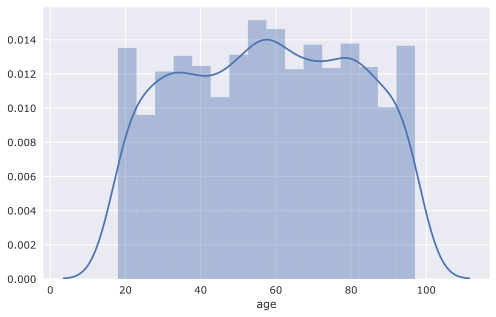

In [723]:
sns.distplot(train.age)
fig = plt.figure()
res = stats.probplot(train.age, plot=plt)

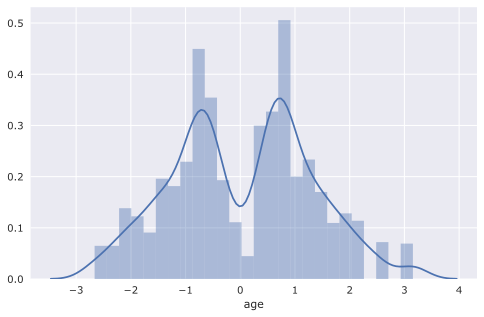

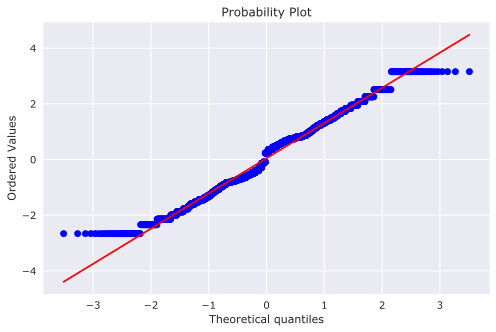

In [724]:
train_age = 2*(train.age - train.age.mean())/(train.age.max()-train.age.min())
s = 2*train_age**2
t = -2*np.log(s)/s
train_age = train_age*np.sign(t) * (t.abs()**(1/2))
sns.distplot(train_age)
fig = plt.figure()
res = stats.probplot(train_age, plot=plt)
test_age =  2*(test.age - test.age.mean())/(test.age.max()-test.age.min())
s = 2*test_age**2
t = -2*np.log(s)/s
test_age = test_age*np.sign(t) * (t.abs()**(1/2))

In [725]:
sns.distplot(train.longdist)
fig = plt.figure()
res = stats.probplot(train.longdist, plot=plt)

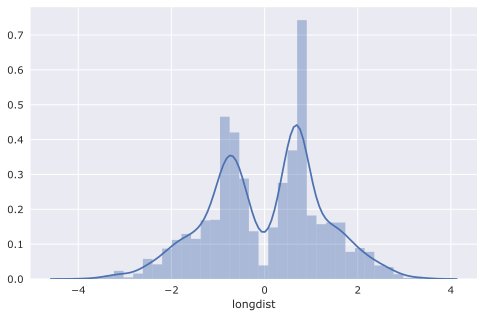

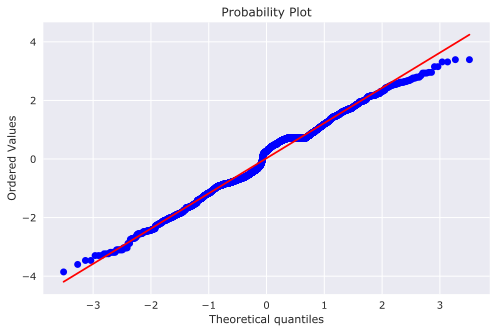

In [726]:
train_longdist = 2*(train.longdist - train.longdist.mean())/(train.longdist.max()-train.longdist.min())
s = 2*train_longdist**2
t = -2*np.log(s)/s
train_longdist = train_longdist*np.sign(t) * (t.abs()**(1/2))
sns.distplot(train_longdist)
fig = plt.figure()
res = stats.probplot(train_longdist, plot=plt)
test_longdist = 2*(test.longdist - test.longdist.mean())/(test.longdist.max()-test.longdist.min())
s = 2*test_longdist**2
t = -2*np.log(s)/s
test_longdist = test_longdist*np.sign(t) * (t.abs()**(1/2))

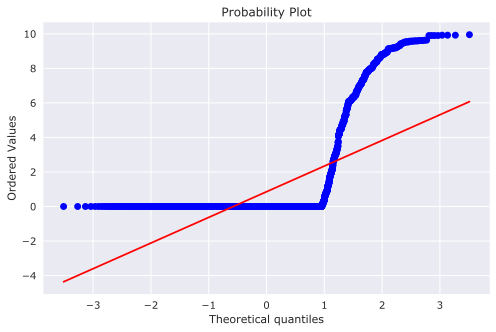

In [727]:
sns.distplot(train.internat);
fig = plt.figure()
res = stats.probplot(train.internat, plot=plt)

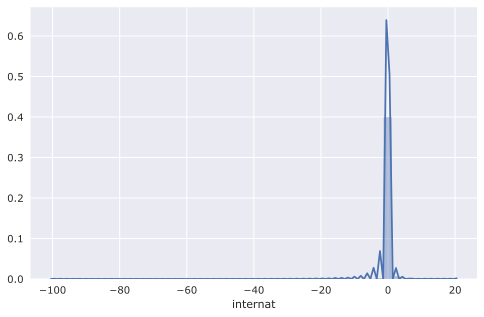

In [728]:
#sns.distplot(np.sign(train.internat) * (train.internat.abs()**(1/3)))
train_internat = 1/np.log(train.internat+0.0001)
sns.distplot(train_internat)
fig = plt.figure()
res = stats.probplot(train_internat, plot=plt)
test_internat = 1/np.log(test.internat+0.0001)

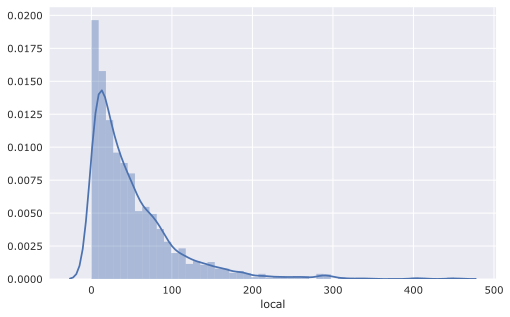

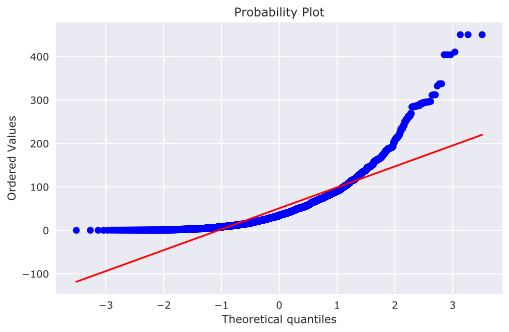

In [729]:
sns.distplot(train.local)
fig = plt.figure()
res = stats.probplot(train.local, plot=plt)

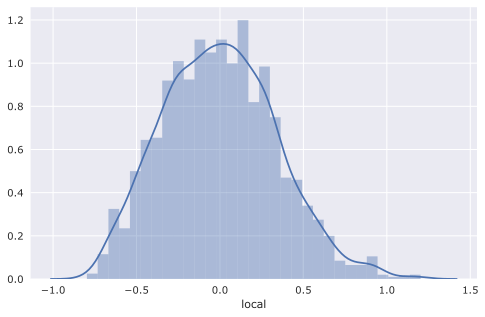

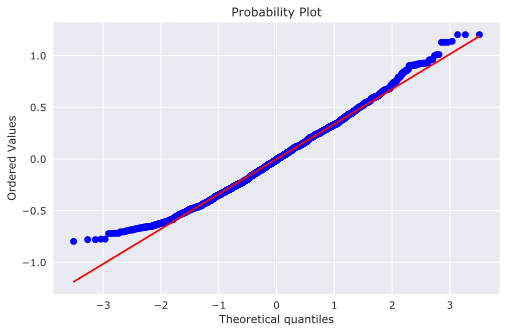

In [730]:
train_local = np.sign(train.local) * (train.local.abs()**(1/3))
train_local = 2*(train_local - train_local.mean())/(train_local.max()-train_local.min())
sns.distplot(train_local)
fig = plt.figure()
res = stats.probplot(train_local, plot=plt)
test_local = np.sign(test.local) * (test.local.abs()**(1/3))
test_local = 2*(test_local - test_local.mean())/(test_local.max()-test_local.min())

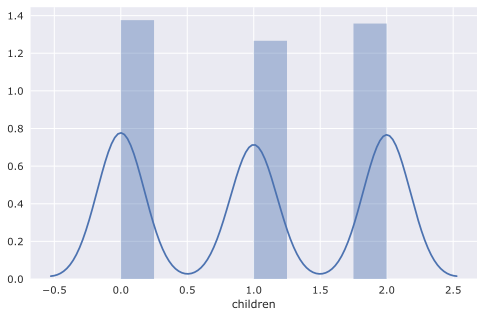

In [731]:
sns.distplot(train.children)
#очевидно, что эту переменную стоит сделать категориальной
train.children = train.children.astype('int').astype('str')
test.children = test.children.astype('int').astype('str')

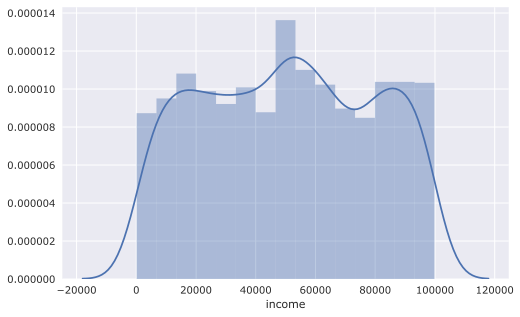

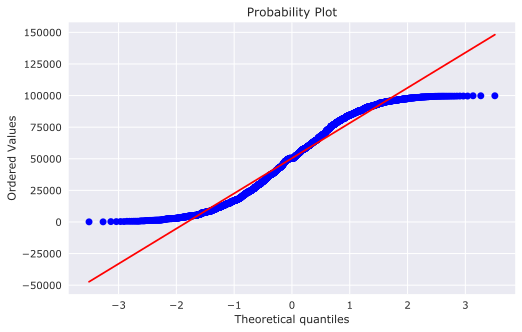

In [732]:
sns.distplot(train.income)
fig = plt.figure()
res = stats.probplot(train.income, plot=plt)

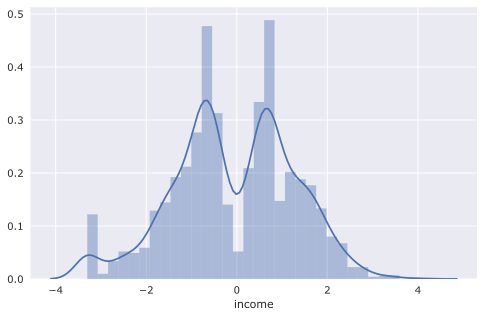

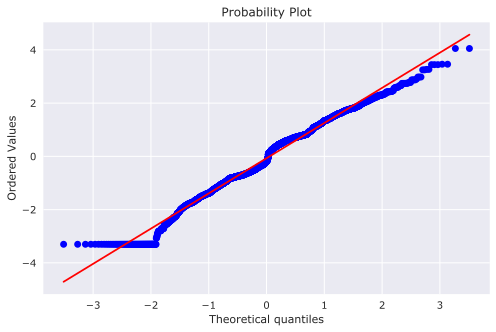

In [733]:
train_income = 2*(train.income - train.income.mean())/(train.income.max()-train.income.min())
s = 2*train_income**2
t = -2*np.log(s)/s
train_income = train_income*np.sign(t) * (t.abs()**(1/2))
sns.distplot(train_income)
fig = plt.figure()
res = stats.probplot(train_income, plot=plt)
test_income = 2*(test.income - test.income.mean())/(test.income.max()-test.income.min())
s = 2*test_income**2
t = -2*np.log(s)/s
test_income = test_income*np.sign(t) * (t.abs()**(1/2))

In [734]:
train.age = train_age
train.longdist = train_longdist
train.internat = train_internat
train.local = train_local
train.income = train_income

test.age = test_age
test.longdist = test_longdist
test.internat = test_internat
test.local = test_local
test.income = test_income

In [738]:
# выполняем дамми-кодирование
#train.info()
train_dummies = pd.get_dummies(train)
train_dummies.info()
#test.info()
test_dummies = pd.get_dummies(test)
test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 2157 to 4105
Data columns (total 22 columns):
longdist               3102 non-null float64
internat               3102 non-null float64
local                  3102 non-null float64
age                    3102 non-null float64
income                 3102 non-null float64
int_disc_Да            3102 non-null uint8
int_disc_Нет           3102 non-null uint8
billtype_Бесплатный    3102 non-null uint8
billtype_Бюджетный     3102 non-null uint8
pay_Auto               3102 non-null uint8
pay_CC                 3102 non-null uint8
pay_CD                 3102 non-null uint8
pay_CH                 3102 non-null uint8
gender_Женский         3102 non-null uint8
gender_Мужской         3102 non-null uint8
marital_Женат          3102 non-null uint8
marital_Одинокий       3102 non-null uint8
children_0             3102 non-null uint8
children_1             3102 non-null uint8
children_2             3102 non-null uint8
churn_Остается      

In [739]:
test_dummies.insert(11,'pay_CD', 0)
train_dummies.info()
test_dummies.info()
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'churn_Уходит']
y_test = test_dummies.loc[:, 'churn_Уходит']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# open_account_flg_0 и open_account_flg_1
train_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
test_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'longdist':'children_2']
X_test = test_dummies.loc[:, 'longdist':'children_2']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 2157 to 4105
Data columns (total 22 columns):
longdist               3102 non-null float64
internat               3102 non-null float64
local                  3102 non-null float64
age                    3102 non-null float64
income                 3102 non-null float64
int_disc_Да            3102 non-null uint8
int_disc_Нет           3102 non-null uint8
billtype_Бесплатный    3102 non-null uint8
billtype_Бюджетный     3102 non-null uint8
pay_Auto               3102 non-null uint8
pay_CC                 3102 non-null uint8
pay_CD                 3102 non-null uint8
pay_CH                 3102 non-null uint8
gender_Женский         3102 non-null uint8
gender_Мужской         3102 non-null uint8
marital_Женат          3102 non-null uint8
marital_Одинокий       3102 non-null uint8
children_0             3102 non-null uint8
children_1             3102 non-null uint8
children_2             3102 non-null uint8
churn_Остается      

In [740]:
# применяем RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# строим логистическую регрессию на данных,
# отмасштабированных с помощью RobustScaler
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression().fit(X_train_scaled, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))

AUC на обучающей выборке: 0.826
AUC на контрольной выборке: 0.823


In [741]:
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500, 0.5, 0.00001)
from sklearn.linear_model import LogisticRegressionCV
logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   45.9s finished


LogisticRegressionCV(Cs=array([  1.00000e+10,   8.91045e+09, ...,   1.12228e-15,   1.00000e-15]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=10, random_state=17, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=-1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=1)

In [742]:
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logit_searcher.predict_proba(X_test_scaled)[:, 1])))

AUC на контрольной выборке: 0.819
